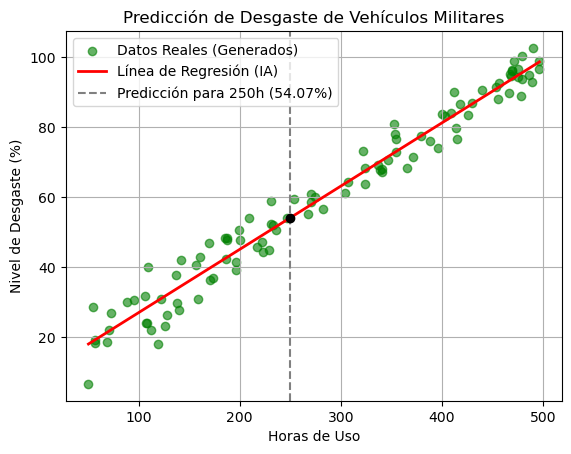

In [2]:
#Solucion:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Clase que representa un registro de uso de un vehículo militar
class VehicleRecord:
    def __init__(self, hours_used, wear_level):
        self.hours_used = hours_used
        self.wear_level = wear_level

    def to_vector(self):
        return[self.hours_used]

# Clase para generar datos sintéticos
class VehicleDataGenerator:
    def __init__(self, num_samples=100):
        self.num_samples = num_samples
        
    def generate(self):
        records = []
        for _ in range(self.num_samples):
            horas = np.random.uniform(50,500)
            ruido = np.random.normal(0,5)
            desgaste = 10+0.18* horas + ruido
            nuevo_registro = VehicleRecord(hours_used=horas,wear_level=desgaste)
            records.append(nuevo_registro)
        return records

# Clase que entrena el modelo de regresión lineal
class VehicleWearRegressor:
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, records):
        X_train = []
        Y_train = []
        for record in records:
            X_train.append(record.to_vector())
            Y_train.append(record.wear_level)
        self.model.fit(X_train, Y_train)

    def predict(self, hours):
        X_to_predict = [[hours]]
        prediction_array = self.model.predict(X_to_predict)
        return prediction_array[0]

    def get_model(self):
        return self.model

# Clase principal para ejecutar el ejemplo
class VehicleWearPredictionExample:
    def run(self):
        generator = VehicleDataGenerator(num_samples=100)
        records = generator.generate()
        regressor = VehicleWearRegressor()
        regressor.fit(records)
        hours_to_predict = 250
        predicted_wear = regressor.predict(hours_to_predict)
        X_data = [r.hours_used for r in records]
        Y_data = [r.wear_level for r in records]
        plt.scatter(X_data, Y_data, color='green', label='Datos Reales (Generados)', alpha=0.6)
        model = regressor.get_model()
        X_line = np.array([min(X_data), max(X_data)]).reshape(-1, 1)
        Y_line = model.predict(X_line)
        plt.plot(X_line, Y_line, color='red', linewidth=2, label='Línea de Regresión (IA)')
        plt.axvline(x=hours_to_predict, color='gray', linestyle='--', 
                    label=f'Predicción para {hours_to_predict}h ({predicted_wear:.2f}%)')
        plt.plot(hours_to_predict, predicted_wear, 'ko')
        plt.title("Predicción de Desgaste de Vehículos Militares")
        plt.xlabel("Horas de Uso")
        plt.ylabel("Nivel de Desgaste (%)")
        plt.legend()
        plt.grid(True)
        plt.show()
        
# Ejecutar el ejemplo
example = VehicleWearPredictionExample()
example.run()



